In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

print("TensorFlow Version: %s" % (tf.__version__))

TensorFlow Version: 2.8.0


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gocollege.csv to gocollege (2).csv


In [ ]:
df = pd.read_csv('gocollege.csv')

df.sample(5)

,voca =0 academic=1,male =1 female=0,Urban1 rural0,parent college 1,parent_age,parent_salary,house_area,average_grades,in_college,Unnamed: 9
359,1,0,0,1,46,3470000,61.2,83.73,0,NaN
335,1,1,0,1,54,8650000,76.7,90.03,1,NaN
366,0,0,0,0,50,6400000,81.3,85.36,1,NaN
822,1,0,1,0,56,5240000,85.9,91.00,1,NaN
903,1,0,1,0,58,3840000,63.7,83.59,0,NaN


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[:] = scaler.fit_transform(df[:])


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


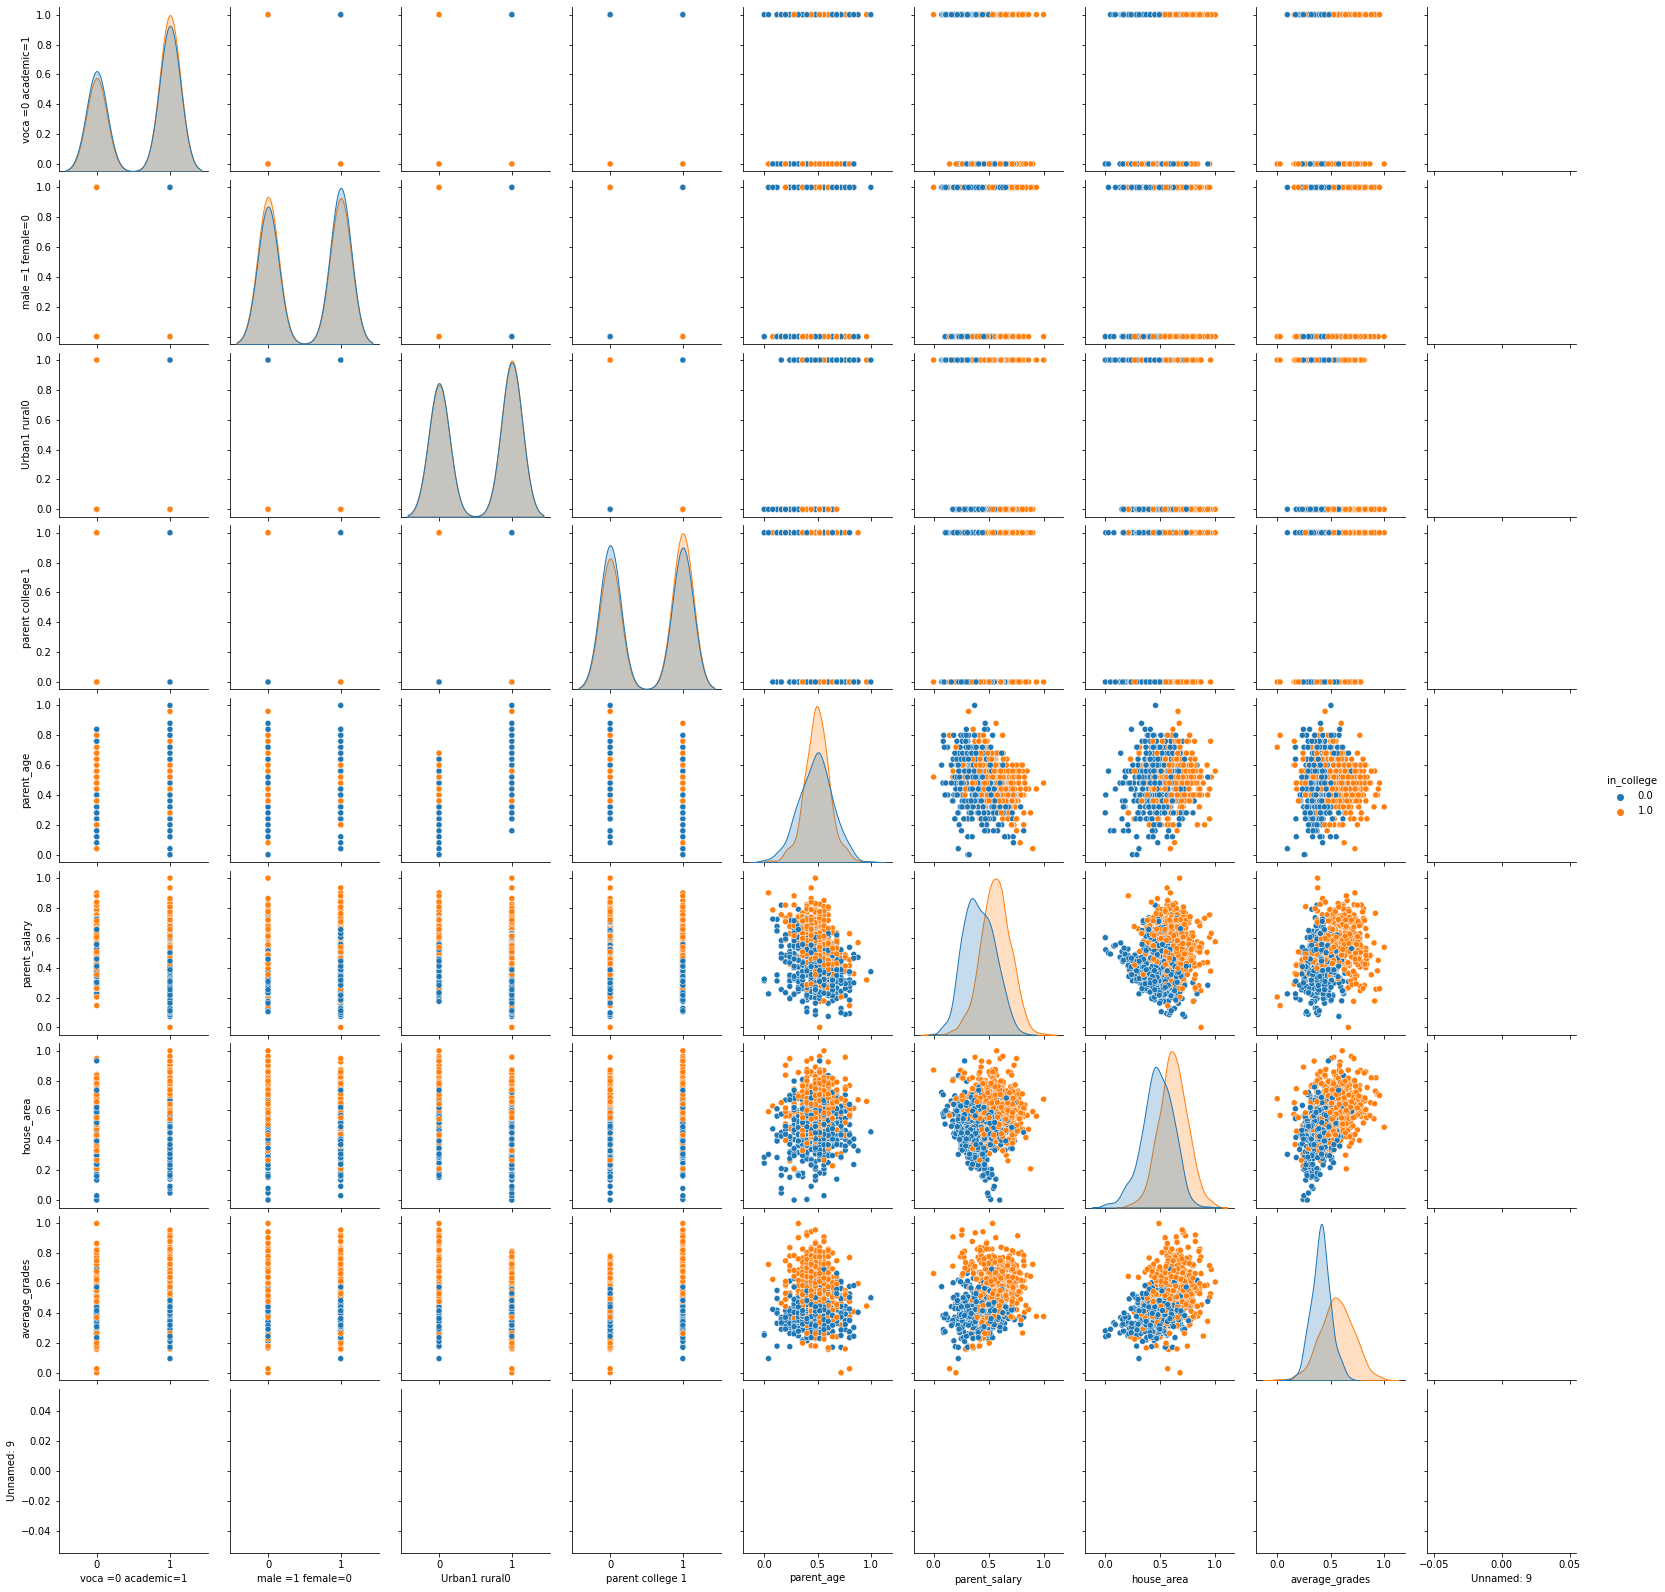

In [ ]:
import seaborn as sns
sns.pairplot(df, hue="in_college")
plt.show()

In [ ]:
print(df)

     voca =0 academic=1  male =1 female=0  Urban1 rural0  parent college 1  \
0                   1.0               1.0            1.0               0.0   
1                   1.0               1.0            1.0               0.0   
2                   1.0               0.0            1.0               0.0   
3                   0.0               1.0            0.0               1.0   
4                   1.0               0.0            1.0               0.0   
..                  ...               ...            ...               ...   
995                 0.0               0.0            0.0               1.0   
996                 1.0               0.0            0.0               1.0   
997                 0.0               1.0            1.0               0.0   
998                 1.0               1.0            0.0               1.0   
999                 1.0               1.0            1.0               1.0   

     parent_age  parent_salary  house_area  average_grades  in_

In [ ]:
x_train = df.iloc[0:700, 0:8].values
y_train = df.iloc[0:700, [-2]].values
x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)

print(x_train.shape, y_train.shape)

x_test = df.iloc[700:, 0:8].values  
y_test = df.iloc[700:, [-2]].values
x_test = np.array(x_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)


(700, 8) (700, 1)


In [ ]:
# dataset parameters.
nb_classes  = y_train.shape[1]   
nb_features = x_train.shape[1] 
print(nb_classes, nb_features)

# training HyperParameters
learning_rate  = 0.001
batch_size     = len(x_train) # 128
epochs         = 5000

# network hyperparameters
n_hidden_1 = 7 # 1st layer number of neurons.
n_hidden_2 = 7 # 2nd layer number of neurons.

n_train = x_train.shape[0] 
n_test  = x_test.shape[0] 

1 8


In [ ]:
# build model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, SGD

model = Sequential()  # 선언
model.add(Dense(units = n_hidden_1, activation='sigmoid', input_shape=(nb_features,)))   # neuron, input column개수
model.add(Dense(n_hidden_2, activation='sigmoid'))
model.add(Dense(nb_classes, activation='sigmoid'))   # ouput column개수
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 7)                 63        
                                                                 
 dense_7 (Dense)             (None, 7)                 56        
                                                                 
 dense_8 (Dense)             (None, 1)                 8         
                                                                 
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',   # y = not one-hot encoding but number
              optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 2501/5000
1/1 - 0s - loss: 0.2989 - accuracy: 0.8857 - val_loss: 0.3449 - val_accuracy: 0.8567 - 39ms/epoch - 39ms/step
Epoch 2502/5000
1/1 - 0s - loss: 0.2989 - accuracy: 0.8857 - val_loss: 0.3449 - val_accuracy: 0.8567 - 36ms/epoch - 36ms/step
Epoch 2503/5000
1/1 - 0s - loss: 0.2989 - accuracy: 0.8857 - val_loss: 0.3449 - val_accuracy: 0.8567 - 34ms/epoch - 34ms/step
Epoch 2504/5000
1/1 - 0s - loss: 0.2988 - accuracy: 0.8857 - val_loss: 0.3448 - val_accuracy: 0.8567 - 33ms/epoch - 33ms/step
Epoch 2505/5000
1/1 - 0s - loss: 0.2988 - accuracy: 0.8857 - val_loss: 0.3448 - val_accuracy: 0.8567 - 38ms/epoch - 38ms/step
Epoch 2506/5000
1/1 - 0s - loss: 0.2988 - accuracy: 0.8857 - val_loss: 0.3448 - val_accuracy: 0.8567 - 38ms/epoch - 38ms/step
Epoch 2507/5000
1/1 - 0s - loss: 0.2987 - accuracy: 0.8857 - val_loss: 0.3448 - val_accuracy: 0.8567 - 36ms/epoch - 36ms/step
Epoch 2508/5000
1/1 - 0s - loss: 0.2987 - accuracy: 0.8857 - val_loss: 0.3448 - va

In [ ]:
# W, b 출력
weights0 = model.layers[0].get_weights()[0]
biases0  = model.layers[0].get_weights()[1]
weights1 = model.layers[1].get_weights()[0]
biases1  = model.layers[1].get_weights()[1]
print("weights0 = \n ", weights0)
print("biases0  = \n ", biases0)
print("weights1 = \n ", weights1)
print("biases1  = \n ", biases1)

weights0 = 
  [[-0.08195031 -1.284915   -1.4643886  -1.564568   -0.94799453 -1.2098237
  -2.0660415 ]
 [-2.782359    0.01330872 -1.3164973   0.3247731   0.47178975  1.0829742
  -1.0527922 ]
 [-2.1463764  -3.7688658   1.5384427  -0.00900359  1.5343955  -1.5442502
  -1.7092185 ]
 [ 2.6833415   1.4127096   3.2874744  -0.26858315 -2.0835981   1.8690959
   1.9786178 ]
 [ 0.7727567  -3.5560796   2.4685686   0.4967405   3.3116643  -1.2765105
  -1.7008895 ]
 [-1.394547   -0.5291216  -0.56951606  4.018848   -3.3751664  -3.7238069
   3.4920583 ]
 [-1.885969    2.2207706   4.4249315   3.0216665  -2.091614   -2.3471243
   4.0513887 ]
 [-0.8837967  -4.074196    0.7432489   0.7434656  -4.0368824   0.57620704
   1.7402586 ]]
biases0  = 
  [ 3.4699361  2.4203842 -2.2638214 -1.3052915  3.8490543  3.0295467
 -2.4589329]
weights1 = 
  [[-0.77828133  3.208422    2.1050398  -2.3876457  -1.9964782  -2.0691442
  -2.3255396 ]
 [-0.7011504   2.5785518   2.0041964  -1.6249682  -1.9593607  -1.6790303
  -2.313888

In [ ]:
for layer in model.layers:
    params = layer.get_weights()
    weights = np.array(params[0])
    biases  = np.array(params[1])
    print('weights = \n ', weights)
    print('biases  = \n ', biases)
    print('*' * 50)
#weights = np.array(weights[0])
#print(weights)

weights = 
  [[-0.08195031 -1.284915   -1.4643886  -1.564568   -0.94799453 -1.2098237
  -2.0660415 ]
 [-2.782359    0.01330872 -1.3164973   0.3247731   0.47178975  1.0829742
  -1.0527922 ]
 [-2.1463764  -3.7688658   1.5384427  -0.00900359  1.5343955  -1.5442502
  -1.7092185 ]
 [ 2.6833415   1.4127096   3.2874744  -0.26858315 -2.0835981   1.8690959
   1.9786178 ]
 [ 0.7727567  -3.5560796   2.4685686   0.4967405   3.3116643  -1.2765105
  -1.7008895 ]
 [-1.394547   -0.5291216  -0.56951606  4.018848   -3.3751664  -3.7238069
   3.4920583 ]
 [-1.885969    2.2207706   4.4249315   3.0216665  -2.091614   -2.3471243
   4.0513887 ]
 [-0.8837967  -4.074196    0.7432489   0.7434656  -4.0368824   0.57620704
   1.7402586 ]]
biases  = 
  [ 3.4699361  2.4203842 -2.2638214 -1.3052915  3.8490543  3.0295467
 -2.4589329]
**************************************************
weights = 
  [[-0.77828133  3.208422    2.1050398  -2.3876457  -1.9964782  -2.0691442
  -2.3255396 ]
 [-0.7011504   2.5785518   2.0041964

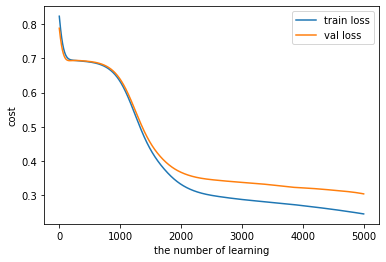

In [ ]:
# 5. 모델 학습 과정 표시하기
plt.plot(history.history['loss'],     label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.xlabel('the number of learning')
plt.ylabel('cost')
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:',     score[0])
print('Train accuracy:', score[1])

score_test = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:',     score_test[0])
print('Test accuracy:', score_test[1])

Train loss: 0.24455003440380096
Train accuracy: 0.8942857384681702
Test loss: 0.3032675087451935
Test accuracy: 0.8799999952316284


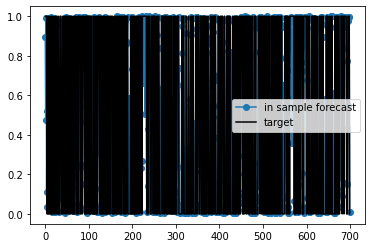

In [ ]:
in_sample_forecast = model.predict(x_train)

plt.plot(in_sample_forecast, 'o-', label='in sample forecast')
plt.plot(y_train, 'k-',   label='target')
plt.legend(loc='best')
plt.show()

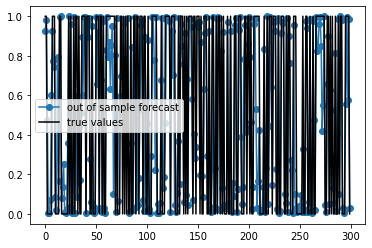

In [ ]:
# out-of-sample.
out_of_forecast = model.predict(x_test)

plt.plot(out_of_forecast, 'o-', label='out of sample forecast')
plt.plot(y_test, 'k-', label='true values')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# train
ypred_prob = model.predict(x_train)
ypred_int  = (model.predict(x_train) >= 0.5).astype(int)

print(confusion_matrix(y_train, ypred_int))
print(classification_report(y_train, ypred_int))
print('*'*50)

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print('Accuracy  = ', accuracy_score(y_train, ypred_int))
print('Precision = ', precision_score(y_train, ypred_int))
print('Recall    = ', recall_score(y_train, ypred_int))
print('F1        = ', f1_score(y_train, ypred_int))


# test
ypred_prob = model.predict(x_test)
ypred_int  = (model.predict(x_test) >= 0.5).astype(int)

print(confusion_matrix(y_test, ypred_int))
print(classification_report(y_test, ypred_int))
print('*'*50)

print('Accuracy  = ', accuracy_score(y_test, ypred_int))
print('Precision = ', precision_score(y_test, ypred_int))
print('Recall    = ', recall_score(y_test, ypred_int))
print('F1        = ', f1_score(y_test, ypred_int))

[[319  38]
 [ 36 307]]
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90       357
         1.0       0.89      0.90      0.89       343

    accuracy                           0.89       700
   macro avg       0.89      0.89      0.89       700
weighted avg       0.89      0.89      0.89       700

**************************************************
Accuracy  =  0.8942857142857142
Precision =  0.8898550724637682
Recall    =  0.8950437317784257
F1        =  0.8924418604651163
[[132  11]
 [ 25 132]]
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88       143
         1.0       0.92      0.84      0.88       157

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

**************************************************
Accuracy  =  0.88
Precision =  0.9230769230769231
Recall    =  0.84076